In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, time, datetime
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [39]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## About Dataset
**Objective:**  "Predict behavior to retain customers. Analyze all relevant customer data and develop focused customer retention programs."

**Content:**  Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df.drop(columns="customerID")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [45]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
df.dropna(how='any',inplace=True,axis=0)

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
palette=sns.color_palette("Set2")
palette[5:]

[(1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

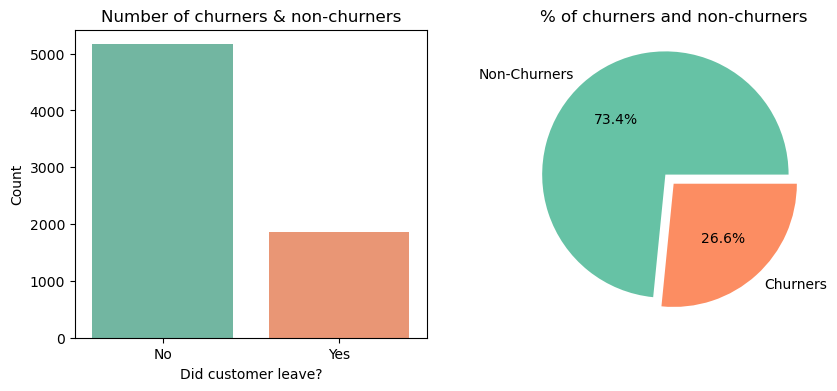

In [53]:
palette=sns.color_palette("Set2")

fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x=df.Churn.value_counts().index, y=df.Churn.value_counts(), data=df,ax=ax1,palette=palette)
ax1.set_xlabel('Did customer leave?')
ax1.set_ylabel('Count')
ax1.set_title("Number of churners & non-churners")

ax2 = plt.pie(df.Churn.value_counts(), explode = (.1,0), labels = ["Non-Churners","Churners"], autopct='%1.1f%%',colors=palette)
plt.title("% of churners and non-churners")

plt.show()

**Insights:**
1. The dataset shows that 73.4% of customers stayed with the service, while 26.6% left the service or company.
2. The churn-to-non-churn ratio is 73:27, indicating a highly imbalanced dataset.
3. CustomerID does not contribute to the analysis and should be removed.

In [54]:
mapping = {"No": 0, "Yes": 1}
df['Churn'].replace(mapping, inplace=True)

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Analysis

## Gender

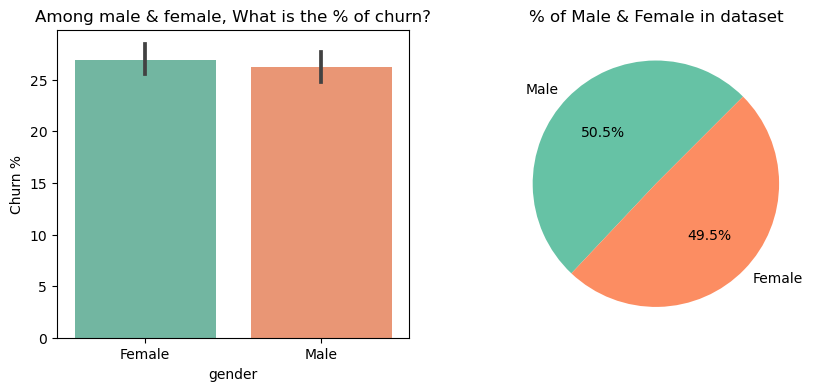

In [56]:
fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x='gender', y=df.Churn*100, data=df,ax=ax1,palette=palette)
ax1.set_ylabel('Churn %')
ax1.set_title("Among male & female, What is the % of churn?")

ax2 = plt.pie(df["gender"].value_counts(), labels =df["gender"].value_counts().index, autopct='%1.1f%%',startangle = 45,colors=palette)
plt.title("% of Male & Female in dataset")

plt.show()

**Insights:**
* The dataset shows a nearly equal distribution of male and female customers.
* In both the churned and retained categories, the proportions of males and females are almost identical.
* Approximately 26% of male customers churned, while the churn rate for female customers is about 27%. These figures are quite similar.
* Therefore, it can be concluded that customer churn is not influenced by gender.

## Senior Citizen

In [57]:
mapping={1:"Yes",0:"No"}
df['SeniorCitizen'].replace(mapping, inplace=True)

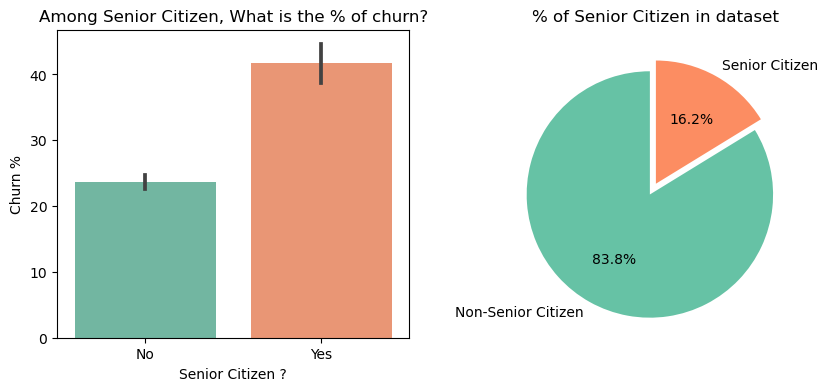

In [58]:
fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x='SeniorCitizen', y=df.Churn*100, data=df,ax=ax1,palette=palette)
ax1.set_xlabel('Senior Citizen ?')
ax1.set_ylabel('Churn %')
ax1.set_title("Among Senior Citizen, What is the % of churn?")

ax2 = plt.pie(df["SeniorCitizen"].value_counts(), startangle = 90 ,explode = (.1,0), colors=palette,autopct='%1.1f%%', labels = ["Non-Senior Citizen", "Senior Citizen"])
plt.title("% of Senior Citizen in dataset")

plt.show()

**INSIGHTS:**
* The dataset predominantly consists of non-senior citizens, who make up over 80% of the customer base.
* Among senior citizens, more than 40% have churned, whereas the churn rate for younger customers is under 25%.
* This indicates that senior citizens are more likely to churn compared to younger customers.
* Consequently, there appears to be a significant relationship between the SeniorCitizen status and the likelihood of churn.

## Partners

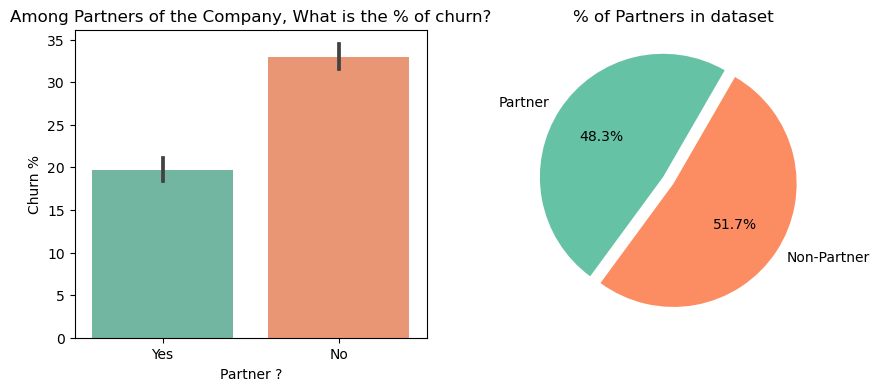

In [59]:
palette=sns.color_palette("Set2")
fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x='Partner', y=df.Churn*100, data=df,ax=ax1, palette=palette)
ax1.set_xlabel('Partner ?')
ax1.set_ylabel('Churn %')
ax1.set_title("Among Partners of the Company, What is the % of churn?")

ax2 = plt.pie(df["Partner"].value_counts().sort_values(), colors=palette, startangle = 60 ,explode = (.1,0), autopct='%1.1f%%', labels = ["Partner", "Non-Partner"])
plt.title("% of Partners in dataset")

plt.show()

**INSIGHTS:**
* The distribution of customers with partners and those without is roughly equal. Among customers with partners, around 20% have churned, while the churn rate for those without partners is below 33%.
* This suggests that having a partner is associated with a lower likelihood of churn, indicating that customers with partners are less prone to leaving.

## Dependents

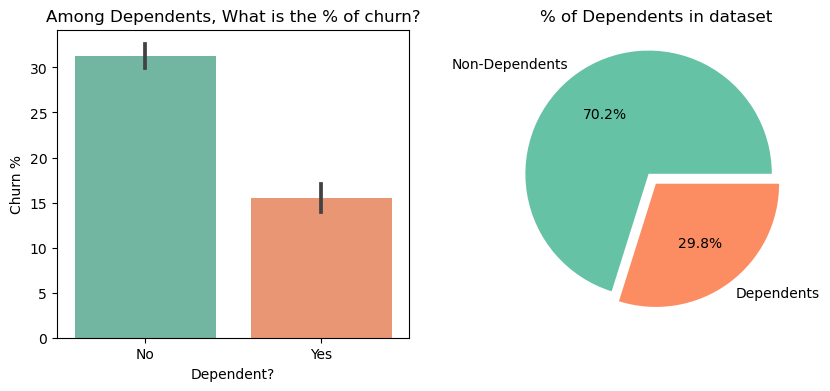

In [60]:
palette=sns.color_palette("Set2")

fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x='Dependents', y=df.Churn*100, data=df,ax=ax1,palette=palette)
ax1.set_xlabel('Dependent?')
ax1.set_ylabel('Churn %')
ax1.set_title("Among Dependents, What is the % of churn?")

ax2= plt.pie(df["Dependents"].value_counts(), startangle = 0 ,colors =palette,explode = (.1,0), autopct='%1.1f%%', labels = ['Non-Dependents', 'Dependents'])
plt.title("% of Dependents in dataset")

plt.show()

**INSIGHTS:**
1. The dataset reveals that customers who live alone or do not have dependents are more likely to churn, with churn rates around 35% and 30%, respectively. In contrast, customers with a partner or dependents tend to have lower churn rates, approximately 20%.
2. Overall, the data suggests that single and independent customers—those without partners or dependents—are more prone to leaving the Service Provider, while those with family connections (a partner and/or dependents) are more likely to remain loyal.

## Tenure & Tenure Group

In [61]:
labels = ["Year {0}".format(int(i/12)+1) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

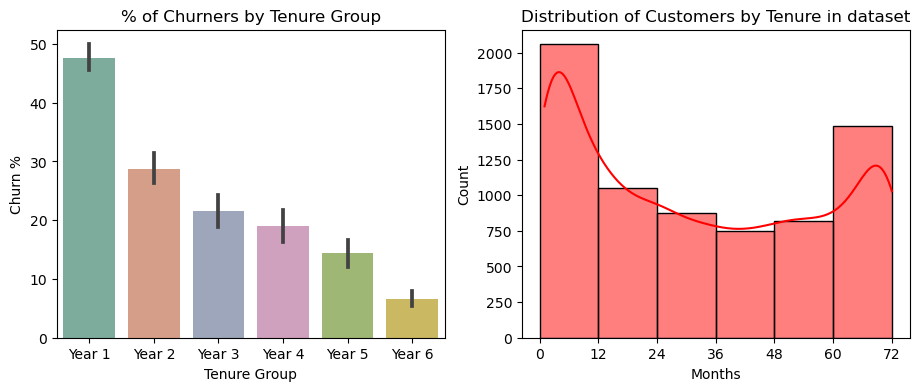

In [62]:
palette=sns.color_palette("Set2")

fig, [ax1, ax2 ]= plt.subplots(1,2,figsize=(11,4))
ax2=sns.histplot(df.tenure, kde=True, bins=range(0,80,12), ax= ax2, color='red')
ax2.set_xlabel("Months")
ax2.set_title('Distribution of Customers by Tenure in dataset')
ax2.set_xticks(np.arange(0, 73, 12))

ax1= sns.barplot(x=df.tenure_group, y=df.Churn*100 , ax =ax1, color="red",saturation=.5,palette=palette)
ax1.set_xlabel("Tenure Group")
ax1.set_title('% of Churners by Tenure Group')
ax1.set_ylabel("Churn %")
plt.show()

**INSIGHTS:**
1. The dataset shows that the majority of customers have a tenure of less than a year, indicating either a high churn rate within the first year or a large proportion of newly acquired customers.

2. There is a noticeable increase in the number of customers who have been with the company for more than 5 years, suggesting a group of long-term loyal customers.

3. The churn rate is significantly higher among newly acquired customers, with almost 50% of those who subscribed within the last year leaving the company. However, as customer tenure increases, the likelihood of churn decreases.

4. To improve retention, the company should focus on strategies to retain newly acquired customers. Successfully engaging customers for the first few years can significantly increase the probability of them remaining long-term.

## Payment Methods

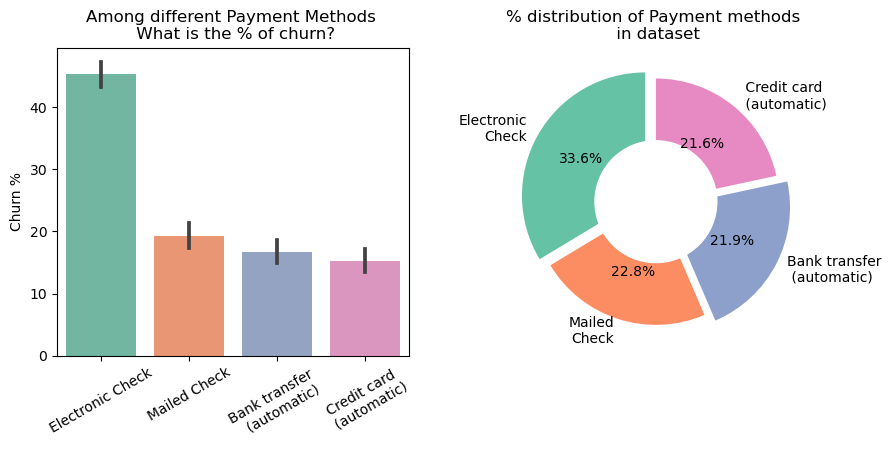

In [63]:
palette=sns.color_palette("Set2")

fig, [ax1,ax2]= plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(x='PaymentMethod', y=df.Churn*100, data=df,ax=ax1,palette=palette)
ax1.set_xlabel('')
ax1.set_ylabel('Churn %')
ax1.set_xticklabels(labels= ['Electronic Check', 'Mailed Check', 'Bank transfer \n (automatic)',' Credit card \n (automatic)'], rotation=30)
ax1.set_title("Among different Payment Methods \n What is the % of churn?")

ax2 = plt.pie(df["PaymentMethod"].value_counts(),colors=palette, labels=['Electronic\nCheck', 'Mailed\nCheck', 'Bank transfer \n (automatic)',' Credit card \n (automatic)'],radius=1, startangle = 90 ,explode = (.1,0,0.1,0), autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("% distribution of Payment methods \n in dataset")

plt.show()

**INSIGHTS**
1. Customers using "Electronic Check" as their payment method make up the largest group (about 34%) and also have the highest churn rate, around 45%.
2. To reduce churn, the Service Provider should encourage and promote the use of automated payment methods, which may help in retaining customers more effectively.

## Contract Type

In [64]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

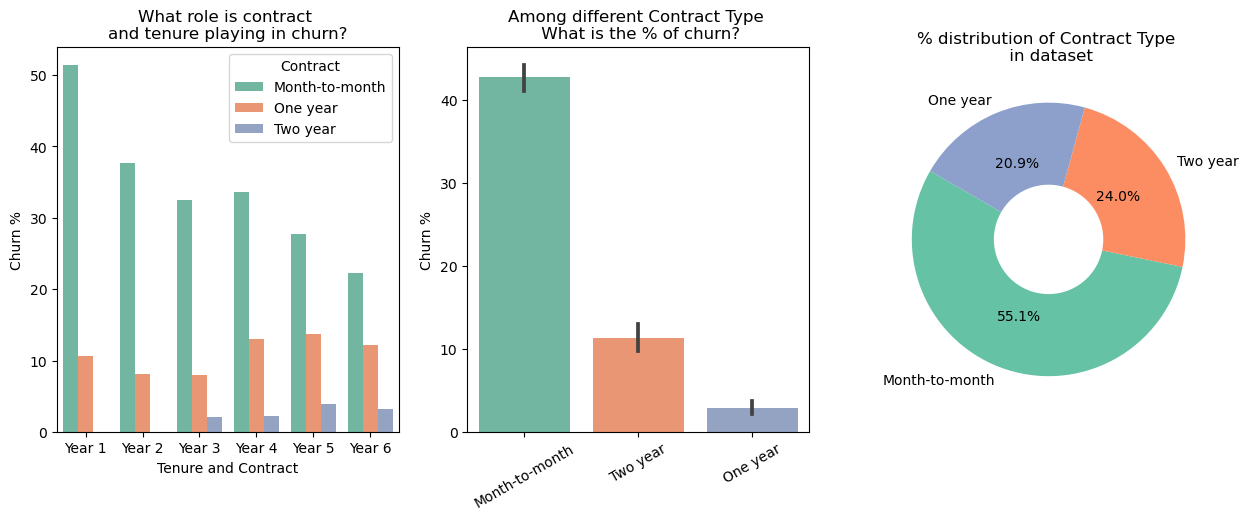

In [65]:
palette=sns.color_palette("Set2")

fig, [ax1,ax2,ax3]= plt.subplots(1,3,figsize=(15,5))

sns.barplot(x="tenure_group", y=df.Churn*100, hue="Contract", data=df,ci=None, ax=ax1, palette=palette)
ax1.set_xlabel('Tenure and Contract')
ax1.set_ylabel('Churn %')
ax1.set_title('What role is contract \nand tenure playing in churn?')

ax2=sns.barplot(x='Contract', y=df.Churn*100, data=df,ax=ax2,palette=palette)
ax2.set_xlabel('')
ax2.set_ylabel('Churn %')
ax2.set_xticklabels(labels=df.Contract.value_counts().index, rotation=30)
ax2.set_title("Among different Contract Type \n What is the % of churn?")

ax3 = plt.pie(df["Contract"].value_counts(), labels=df.Contract.value_counts().index, colors=palette, startangle = 150 ,explode = (0,0,0), autopct='%1.1f%%',)
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title("% distribution of Contract Type \n in dataset")

plt.show()

**INSIGHTS**
- The company should aim to sign customers on longer-term contracts rather than monthly plans, as this is a key factor in reducing churn.

- Around 55% of customers are on month-to-month plans, while a little over 20% are on 1-year or 2-year contracts.

- The churn rate is highest among customers on monthly plans and lowest among those on 2-year contracts. While this difference is expected due to contract duration, it highlights an urgent need for the company to focus on retaining contracted customers to bring their churn rate closer to zero, while also addressing churn among month-to-month customers.

## Monthly Charges & Total Charges

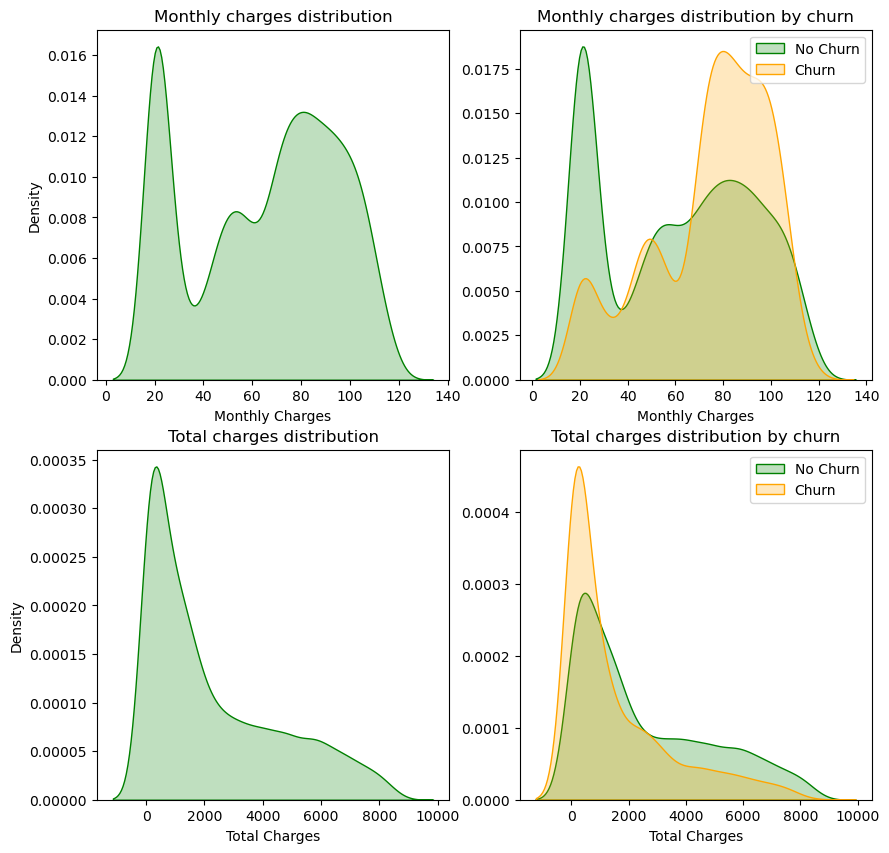

In [66]:
fig, [[ax1, ax2],[ax3, ax4]]= plt.subplots(2,2,figsize=(10,10))
sns.kdeplot(df.MonthlyCharges, ax=ax1, fill=True,color='green')
ax1.set_ylabel('Density')
ax1.set_xlabel('Monthly Charges')
ax1.set_title('Monthly charges distribution')

sns.kdeplot(df['MonthlyCharges'][df.Churn==0], ax=ax2, color='green', fill=True)
sns.kdeplot(df['MonthlyCharges'][df.Churn==1], ax=ax2, color='orange', fill=True)
ax2.legend(["No Churn","Churn"],loc='upper right')
ax2.set_ylabel('')
ax2.set_xlabel('Monthly Charges')
ax2.set_title('Monthly charges distribution by churn')


sns.kdeplot(df.TotalCharges, ax=ax3, fill=True,color='green')
ax3.set_ylabel('Density')
ax3.set_xlabel('Total Charges')
ax3.set_title('Total charges distribution')

sns.kdeplot(df['TotalCharges'][df.Churn==0], ax=ax4, color='green', fill=True)
sns.kdeplot(df['TotalCharges'][df.Churn==1], ax=ax4, color='orange', fill=True)
ax4.legend(["No Churn","Churn"],loc='upper right')
ax4.set_ylabel('')
ax4.set_xlabel('Total Charges')
ax4.set_title('Total charges distribution by churn')
plt.show()

**INSIGHTS**
1. Customers on lower-cost plans tend to have a lower churn rate, while those with higher monthly charges are more likely to leave.
2. Most customers have lower total charges, but the highest churn rate is observed among those with higher overall spending.

**Interesting Observation** : However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

## Operational Services

In [67]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [68]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [69]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

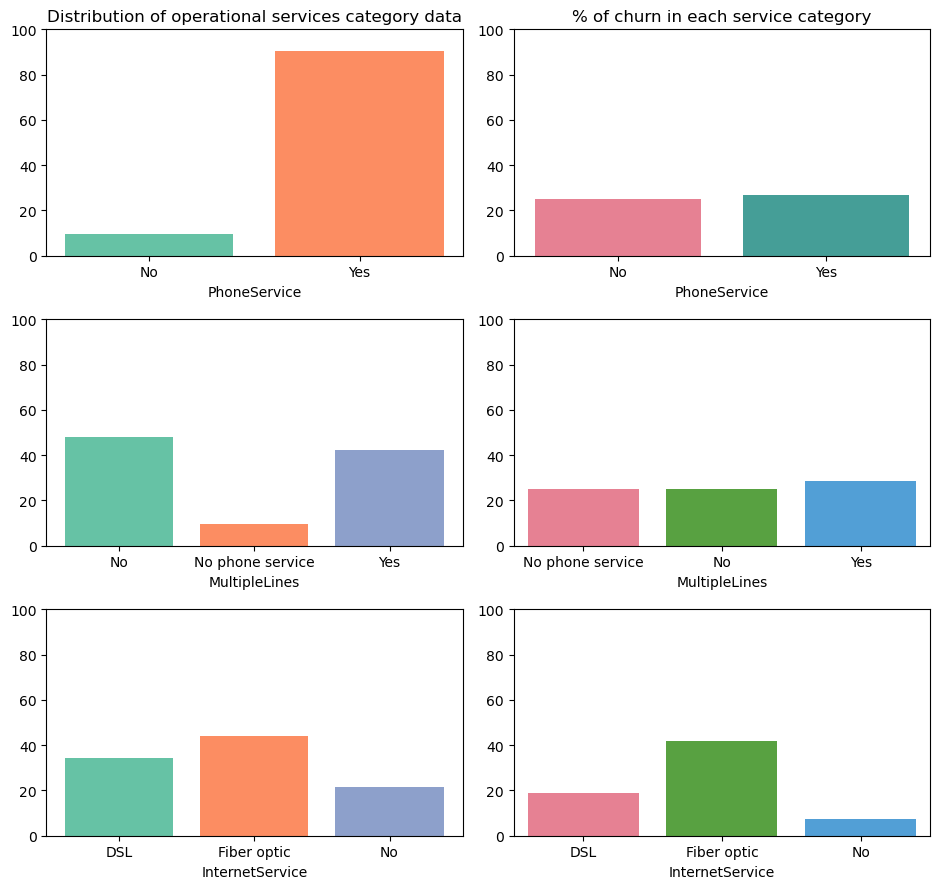

In [70]:

Services = ['PhoneService', 'MultipleLines', 'InternetService']
n_cols = 2
n_rows = len(Services)
fig = plt.figure(figsize=(9.5,9))
#fig.suptitle('Distribution of Service Types and relation with Churn')
idx = 0

for serviceType in enumerate(Services):
    # Fetch data of Service Type
    data = df[serviceType[1]].value_counts(normalize=True).sort_index()

    # Now, plot the data
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        # On column 1 - Plot the data distribution on bar plot
        if idx%2 != 0:
            axes.bar(data.index, data*100, color=palette)
        # On column 2 - Plot the percentage of churns on each service type
        else:
            sns.barplot(x=serviceType[1], y=df.Churn*100, data=df, ci=None, ax=axes, palette='husl')

        if idx == 1 : axes.set_title('Distribution of operational services category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

**INSIGHTS**
- **Phone Service**: Nearly 90% of customers have Phone Service, with a churn rate of around 25%. Customers without Phone Service also have a similar churn rate (25%) but make up only 10% of the customer base. This suggests that offering Phone Service is advantageous for the Service Provider.

- **Multiple Lines**: Among Phone Service users, 45% have multiple lines, and the rest have a single line. The churn rate is slightly higher for customers with multiple lines (~28%), but the difference is not significant.

- **Internet Service**: Around 20% of customers do not use Internet Service. Of those who do, approximately 45% use Fiber Optic and 35% use DSL. Churn is notably higher among Fiber Optic users (over 40%) compared to DSL users (20%). This indicates a need for the Company to improve its high-speed internet offerings to reduce churn.

## Additional Services

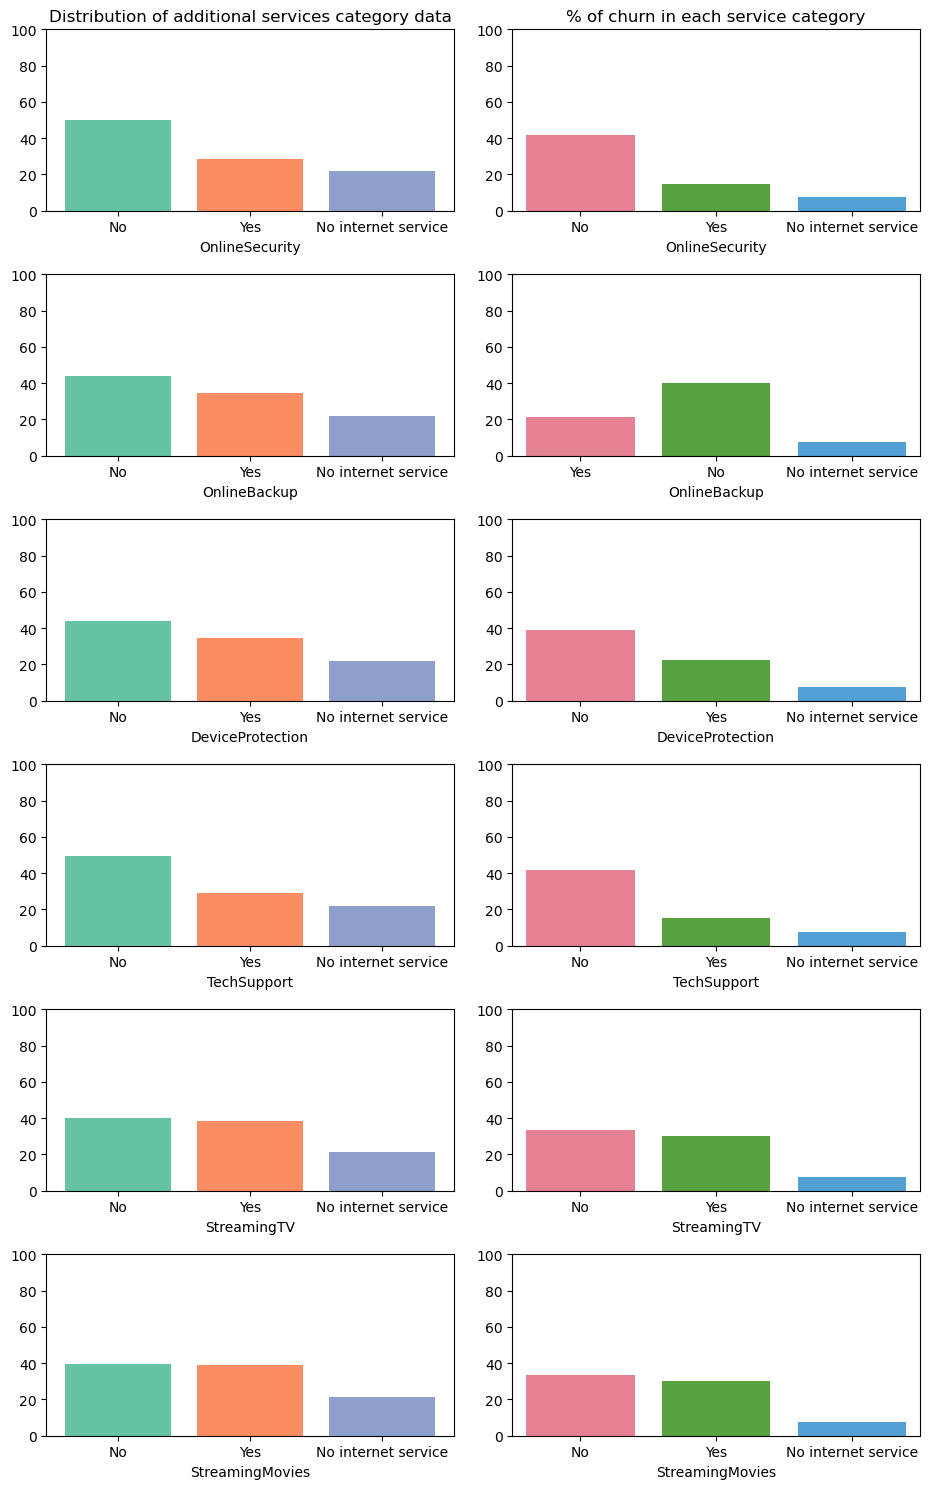

In [71]:
Add_Services = ['OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
n_rows = len(Add_Services)
fig = plt.figure(figsize=(9.5,15))
#fig.suptitle('Distribution of Service Types and relation with Churn')
idx = 0

for serviceType in enumerate(Add_Services):
    # Fetch data of Service Type
    data = df[serviceType[1]].value_counts(normalize=True)

    # Now, plot the data
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        # On column 1 - Plot the data distribution on bar plot
        if idx%2 != 0:
            axes.bar(data.index, data*100, color=palette)
        # On column 2 - Plot the percentage of churns on each service type
        else:
            sns.barplot(x=serviceType[1], y=df.Churn*100, data=df, ci=None, ax=axes,palette='husl')

        if idx == 1 : axes.set_title('Distribution of additional services category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

**INSIGHTS**
- **Online Security**: Around 50% of customers do not use the online security service, and these customers have the highest churn rate (40%).

- **Online Backup, Device Protection, and Tech Support**: Similar to online security, most customers do not use these services, and those who do not are more likely to churn.

- **Streaming TV and Streaming Movies**: Among customers with Internet Service (required to access these streaming services), about half use them. The churn rate is approximately the same (~35%), regardless of whether or not they use the streaming services.

## Paperless Billing

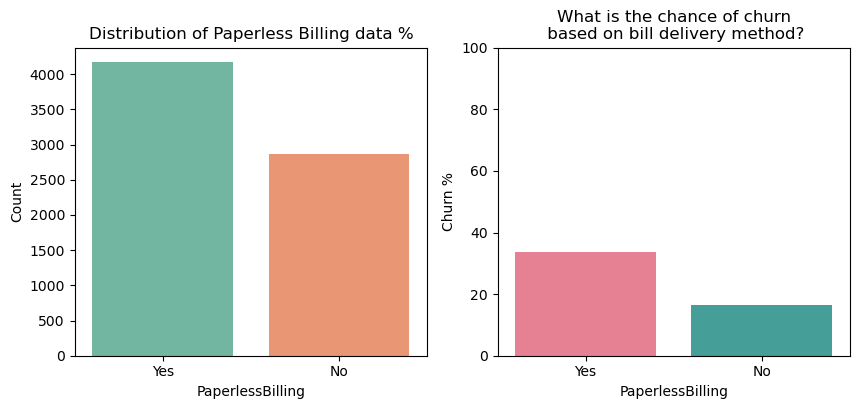

In [72]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(10,4))

# Plot distribution of Contract data
axes1=sns.barplot(x=df['PaperlessBilling'].value_counts().index , y=df['PaperlessBilling'].value_counts() , ax=axes1, palette=palette)
axes1.set_title('Distribution of Paperless Billing data %')
axes1.set_ylabel('Count')
axes1.set_xlabel('PaperlessBilling')


# Chances of churn based on Contract
axes2=sns.barplot(x=df["PaperlessBilling"], y=df.Churn*100, data=df, ci=None, ax=axes2,palette='husl')
axes2.set_ylabel('Churn %')
axes2.set_title('What is the chance of churn\n based on bill delivery method?')
axes2.set_ylim(0,100)

plt.show()

**INSIGHTS**
- Nearly 60% of customers prefer paperless billing, and around 35% of them have churned.

- While there isn't an obvious direct link between billing method and churn, it's worth investigating whether customers receiving electronic bills are receiving clear and transparent information about charges and adequate support when they have difficulties understanding their bills.

In [73]:
df.to_csv('tel_churn.csv')